In [13]:
import pandas as pd
idx = pd.IndexSlice

import urllib.request
import px_reader

# Getting Data from CSO

Let's demonstrate, how data can be obtained from the CSO website.  We use [pandas](https://pandas.pydata.org/) for the backend.  

The [CSO website](https://www.cso.ie/en/databases/) seems to provide data in two different formats, `json` and `px`. For example, the file `LRM01` is available as [json](https://www.cso.ie/StatbankServices/StatbankServices.svc/jsonservice/responseinstance/LRM01) or [PX File](https://statbank.cso.ie/px/pxeirestat/Database/eirestat/Live%20Register/LRM01.px). While JSON
is well known in Python, let's here use the `PX File` format. We use [`px_reader`](https://github.com/ljleppan/py3-opendata) which is open source and seems to work quite well


In [ ]:
EXAMPLE_URL = "https://statbank.cso.ie/px/pxeirestat/Database/eirestat/Live%20Register/LRM01.px"

In [10]:
local_filename, headers = urllib.request.urlretrieve(EXAMPLE_URL)

pxo = px_reader.Px(local_filename)
pxo.stub, pxo.heading

In [3]:
df= pxo.pd_dataframe().astype(int)
df.head()

2006M01                                   \
                                  Both sexes                                    
                                    All ages Under 25 years 25 years and over   
All classes                           160139          31277            128862   
Jobseekers allowance applications      86123          22273             63850   
Jobseekers benefit claims              64114           8876             55238   
Other registrants                       9902            128              9774   

                                                                             \
                                      Male                                    
                                  All ages Under 25 years 25 years and over   
All classes                          95920          18530             77390   
Jobseekers allowance applications    62047          13314             48733   
Jobseekers benefit claims            31141           5174             25967   
Other registrants                     2732             42              2690   

                                                                             \
                                    Female                                    
                                  All ages Under 25 years 25 years and over   
All classes                          64219          12747             51472   
Jobseekers allowance applications    24076           8959             15117   
Jobseekers benefit claims            32973           3702             29271   
Other registrants                     7170             86              7084   

                                     2006M02  ...           2020M02  \
                                  Both sexes  ...            Female   
                                    All ages  ... 25 years and over   
All classes                           159617  ...             70987   
Jobseekers allowance applications      86273  ...             38213   
Jobseekers benefit claims              63690  ...             18139   
Other registrants                       9654  ...             14635   

                                     2020M03                                   \
                                  Both sexes                                    
                                    All ages Under 25 years 25 years and over   
All classes                           205209          23397            181812   
Jobseekers allowance applications     130296          19038            111258   
Jobseekers benefit claims              53992           4276             49716   
Other registrants                      20921             83             20838   

                                                                             \
                                      Male                                    
                                  All ages Under 25 years 25 years and over   
All classes                         113268          13074            100194   
Jobseekers allowance applications    81229          11187             70042   
Jobseekers benefit claims            25549           1848             23701   
Other registrants                     6490             39              6451   

                                                                             
                                    Female                                   
                                  All ages Under 25 years 25 years and over  
All classes                          91941          10323             81618  
Jobseekers allowance applications    49067           7851             41216  
Jobseekers benefit claims            28443           2428             26015  
Other registrants                    14431             44             14387  

[4 rows x 1539 columns]

In [4]:
dfn = df.stack().stack().T
dfn.index = pd.to_datetime(dfn.index,format="%YM%m")
dfn.tail()

All classes                                           \
           25 years and over                  All ages                  
                  Both sexes Female    Male Both sexes Female    Male   
2019-11-01            159192  69533   89659     177554  76895  100659   
2019-12-01            163527  71749   91778     181996  79118  102878   
2020-01-01            164164  71297   92867     183755  79150  104605   
2020-02-01            162884  70987   91897     182616  79020  103596   
2020-03-01            181812  81618  100194     205209  91941  113268   

                                        Jobseekers allowance applications  \
           Under 25 years                               25 years and over   
               Both sexes Female   Male                        Both sexes   
2019-11-01          18362   7362  11000                            105570   
2019-12-01          18469   7369  11100                            106619   
2020-01-01          19591   7853  11738                            106786   
2020-02-01          19732   8033  11699                            105616   
2020-03-01          23397  10323  13074                            111258   

            ... Jobseekers benefit claims Other registrants               \
            ...            Under 25 years 25 years and over                
            ...                      Male        Both sexes Female  Male   
2019-11-01  ...                      1165             21641  14947  6694   
2019-12-01  ...                      1181             21664  14974  6690   
2020-01-01  ...                      1412             21317  14719  6598   
2020-02-01  ...                      1411             21220  14635  6585   
2020-03-01  ...                      1848             20838  14387  6451   

                                                               
             All ages              Under 25 years              
           Both sexes Female  Male     Both sexes Female Male  
2019-11-01      21741  14997  6744            100     50   50  
2019-12-01      21759  15026  6733             95     52   43  
2020-01-01      21407  14764  6643             90     45   45  
2020-02-01      21304  14682  6622             84     47   37  
2020-03-01      20921  14431  6490             83     44   39  

[5 rows x 36 columns]

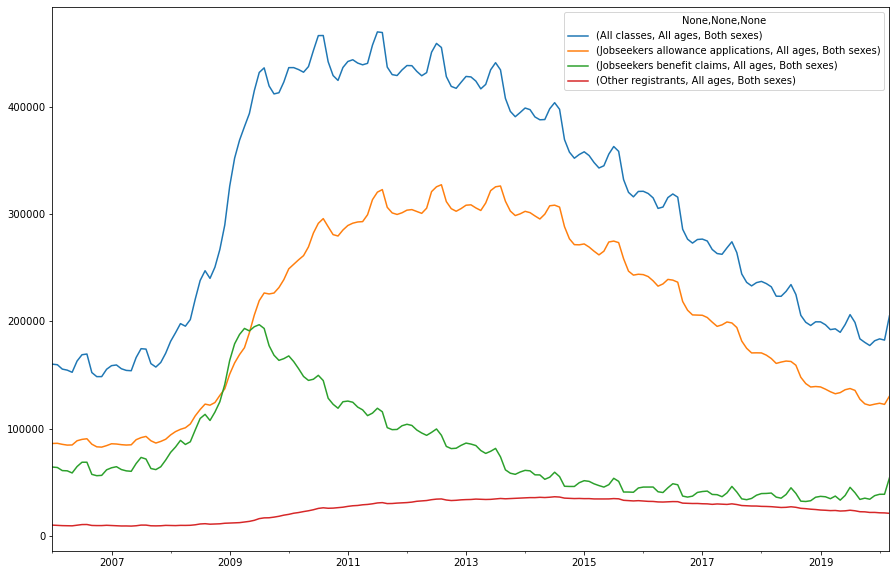

In [5]:
idx = pd.IndexSlice
dfn.loc[idx[:], idx[:,"All ages","Both sexes"] ].plot(figsize=(15,10))

In [7]:
dfn.columns

MultiIndex([(                      'All classes', '25 years and over', ...),
            (                      'All classes', '25 years and over', ...),
            (                      'All classes', '25 years and over', ...),
            (                      'All classes',          'All ages', ...),
            (                      'All classes',          'All ages', ...),
            (                      'All classes',          'All ages', ...),
            (                      'All classes',    'Under 25 years', ...),
            (                      'All classes',    'Under 25 years', ...),
            (                      'All classes',    'Under 25 years', ...),
            ('Jobseekers allowance applications', '25 years and over', ...),
            ('Jobseekers allowance applications', '25 years and over', ...),
            ('Jobseekers allowance applications', '25 years and over', ...),
            ('Jobseekers allowance applications',          'All ages', ...),

## Json file

just for comparison, here how to read the JSON file:

In [1]:
import json
with open("LRM01","r") as f:
    ds = json.load(f)

In [4]:
ds["dataset"].keys()

dict_keys(['dimension', 'label', 'source', 'updated', 'value'])

In [8]:
ds["dataset"]["label"]

'Persons on Live Register by  Social Welfare Scheme, Age Group, Sex and Month'